In [1]:
"""
Michael Murray 1/14/2020
ArchBot Tree data

https://python-graph-gallery.com/85-density-plot-with-matplotlib/ [source]
https://kdepy.readthedocs.io/en/latest/introduction.html
"""

In [2]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy import stats
from KDEpy import FFTKDE

In [3]:
npOne = np.genfromtxt('Treeone.csv',delimiter='/n')
npThree = np.genfromtxt('TreeThree.csv',delimiter='/n')
npSeven = np.genfromtxt('TreeSeven.csv',delimiter='/n')

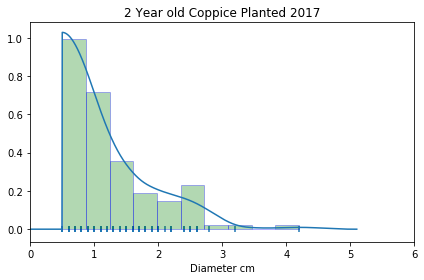

In [4]:

#https://kdepy.readthedocs.io/en/latest/examples.html
# Beta distribution, where x=1 is a hard lower limit

plt.scatter(npOne, np.zeros_like(npOne), marker='|')
plt.hist(npOne, density=True, edgecolor='b', color='g', alpha=0.3)

# Mirror the data about the domain boundary
low_bound = .5
dataOne = np.concatenate((npOne, 2 * low_bound - npOne))

# Compute KDE using the bandwidth found, and twice as many grid points
xOne, yOne = FFTKDE(bw=0.3, kernel='triweight').fit(dataOne)(2**11)
yOne[xOne<=low_bound] = 0  # Set the KDE to zero outside of the domain
yOne = yOne * 2  # Double the y-values to get integral of ~1

plt.xlabel('Diameter cm')
plt.xlim(0, 6)
plt.plot(xOne, yOne, label='Tree One')
plt.title('2 Year old Coppice Planted 2017')
plt.tight_layout()
plt.savefig("OnTwoYearKDE", dpi=300)

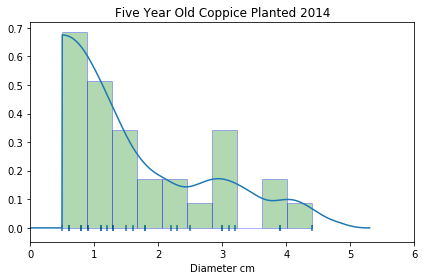

In [5]:
plt.scatter(npSeven, np.zeros_like(npSeven), marker='|')
plt.hist(npSeven, density=True, edgecolor='b', color='g', alpha=0.3)

low_bound = .5
dataSeven = np.concatenate((npSeven, 2 * low_bound - npSeven))

xSeven, ySeven = FFTKDE(bw=0.3, kernel='triweight').fit(dataSeven)(2**11)
ySeven[xSeven<=low_bound] = 0
ySeven = ySeven * 2

plt.xlabel('Diameter cm')
plt.xlim(0, 6)
plt.plot(xSeven, ySeven, label='Tree Seven')
plt.title('Five Year Old Coppice Planted 2014')
plt.tight_layout()
plt.savefig("FiveYearKDE", dpi=300)

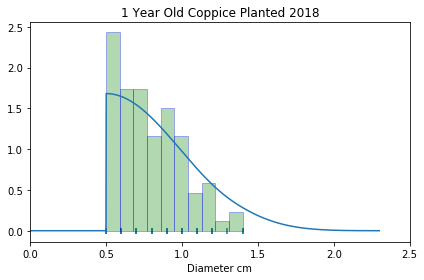

In [6]:
plt.scatter(npThree, np.zeros_like(npThree), marker='|')
plt.hist(npThree, density=True, edgecolor='b', color='g', alpha=0.3)

low_bound = .5
dataThree = np.concatenate((npThree, 2 * low_bound - npThree))

xThree, yThree = FFTKDE(bw=0.3, kernel='triweight').fit(dataThree)(2**11)
yThree[xThree<=low_bound] = 0
yThree = yThree * 2

plt.xlabel('Diameter cm')
plt.xlim(0, 2.5)
plt.plot(xThree, yThree, label='Tree Three')
plt.title('1 Year Old Coppice Planted 2018')
plt.tight_layout()
plt.savefig("OneYearKDE", dpi=300)

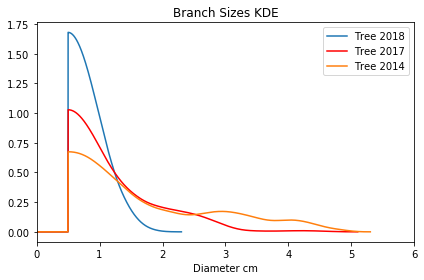

In [7]:
#all in one

plt.plot(xThree, yThree, label='Tree 2018')
plt.plot(xOne, yOne, label='Tree 2017', color = 'r')
plt.plot(xSeven, ySeven, label='Tree 2014')

plt.xlabel('Diameter cm')
plt.xlim(0, 6)
plt.title('Branch Sizes KDE')
plt.tight_layout(); plt.legend();
plt.savefig("AllThree", dpi=300)

In [8]:
file = 'AllBranches.csv'
df = pd.read_csv(file)

In [9]:
x = df.Diameter.values
y = df.RingAge.values

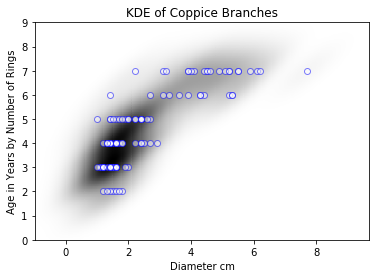

In [11]:
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = stats.kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min()-2:y.max()+2:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap=plt.cm.binary)
plt.scatter(x,y, color='w', edgecolor='b',alpha=0.5)
plt.xlabel('Diameter cm')
plt.ylabel('Age in Years by Number of Rings')
plt.title('KDE of Coppice Branches')
plt.savefig("TwoD_KDE", dpi=300)
plt.show()